WEEK 10 – MACHINE LEARNING (LINEAR REGRESSION) ASSIGNMENT

TASK 1 : UNDERSTANDING THE PROBLEM

In [1]:
import pandas as pd

df = pd.read_csv("Advertising Dataset.csv")
df.head()


,TV,Radio,Newspaper,Sales
0,112.36,13.09,57.20,10.33
1,285.21,12.35,80.54,20.60
2,219.60,45.31,76.02,23.57
3,179.60,12.48,15.39,15.62
4,46.81,13.60,14.92,7.23


Input Features and Target Variable:

Input Features:
- TV
- Radio
- Newspaper

Target Variable:
- Sales

Type of Problem:

This is a Regression problem because the target variable (Sales)
is a continuous numerical value.

TASK 2 : DATA PREPARATION

In [2]:
df.head()


,TV,Radio,Newspaper,Sales
0,112.36,13.09,57.20,10.33
1,285.21,12.35,80.54,20.60
2,219.60,45.31,76.02,23.57
3,179.60,12.48,15.39,15.62
4,46.81,13.60,14.92,7.23


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         2000 non-null   float64
 1   Radio      2000 non-null   float64
 2   Newspaper  2000 non-null   float64
 3   Sales      2000 non-null   float64
dtypes: float64(4)
memory usage: 62.6 KB


In [4]:
df.describe()


,TV,Radio,Newspaper,Sales
count,2000.000000,2000.00000,2000.000000,2000.0000
mean,149.591030,24.81957,49.628485,15.6399
std,87.663294,14.42902,28.794033,5.0721
min,0.970000,0.00000,0.000000,1.9400
25%,71.410000,12.53500,24.697500,11.9800
50%,152.205000,24.63500,49.150000,15.6050
75%,225.200000,37.43250,73.987500,19.4025
max,299.920000,49.98000,99.940000,29.0700


In [5]:
df.isnull().sum()


,0
TV,0
Radio,0
Newspaper,0
Sales,0


Handling Missing Values:

The dataset does not contain any missing values.
Therefore no data cleaning is required.

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']


Feature variables (X): TV, Radio, Newspaper

Target variable (y): Sales

The feature variables represent advertising expenditure,
and the target variable represents product sales.

TASK 3 : TRAIN–TEST SPLIT

 Why Train–Test Split is Required

Train–test split is used to evaluate the performance of a machine learning
model on unseen data. The training data is used to train the model, while
the testing data is used to test how well the model generalizes.

This helps in:
- Preventing overfitting
- Measuring real-world performance
- Ensuring the model does not memorize the data


In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
print("Training data size:", X_train.shape)
print("Testing data size:", X_test.shape)


Training data size: (1600, 3)
Testing data size: (400, 3)


In [11]:
print("Total records:", X.shape[0])
print("Training records:", X_train.shape[0])
print("Testing records:", X_test.shape[0])


Total records: 2000
Training records: 1600
Testing records: 400


TASK 4 : BUILDING LINEAR REGRESSION MODEL


In [12]:
from sklearn.linear_model import LinearRegression


In [13]:
model = LinearRegression()



In [14]:
model.fit(X_train, y_train)


LinearRegression()

In [15]:
print("Model Intercept:", model.intercept_)


Model Intercept: 3.418976369838994


In [16]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

coefficients


,Feature,Coefficient
0,TV,0.044520
1,Radio,0.193477
2,Newspaper,0.014844


TASK 5 : MAKING PREDICTIONS


In [17]:
y_pred = model.predict(X_test)


In [18]:
comparison = pd.DataFrame({
    "Actual Sales": y_test.values[:5],
    "Predicted Sales": y_pred[:5]
})

comparison


,Actual Sales,Predicted Sales
0,24.61,22.345351
1,18.92,15.468148
2,18.85,19.062473
3,14.80,16.109643
4,8.17,7.505518


In [19]:
y_pred[:5]


array([22.34535078, 15.46814778, 19.06247262, 16.10964319,  7.50551757])

The trained Linear Regression model was used to predict sales values
on the testing dataset. These predicted values were then compared
with the actual sales values to evaluate model performance.


TASK 6 : MODEL EVALUATION

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [21]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.2458581369654846
Mean Squared Error (MSE): 2.38200461910464
Root Mean Squared Error (RMSE): 1.543374426088705
R² Score: 0.907924156230024


Explanation of Evaluation Metrics:

• Mean Absolute Error (MAE):
MAE measures the average absolute difference between actual and predicted
values. Lower MAE indicates better model accuracy.

• Mean Squared Error (MSE):
MSE measures the average of squared differences between actual and predicted
values. It penalizes larger errors more heavily.

• Root Mean Squared Error (RMSE):
RMSE is the square root of MSE and represents the error in the same unit as
the target variable. Lower RMSE indicates better performance.

• R² Score:
R² score represents the proportion of variance in the target variable that
is explained by the model. A value closer to 1 indicates a better fit.


TASK 7 : VISUALIZATION & INTERPRETATION

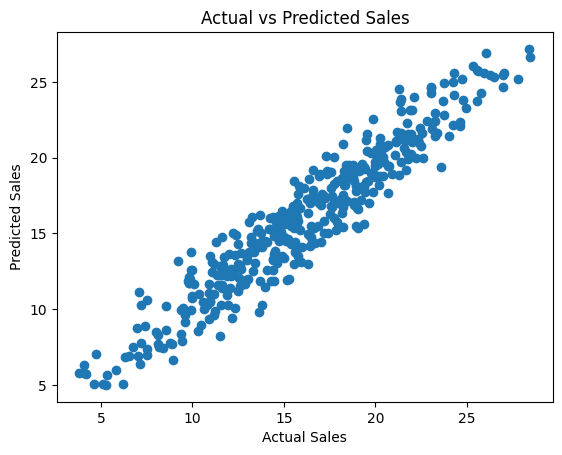

In [22]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


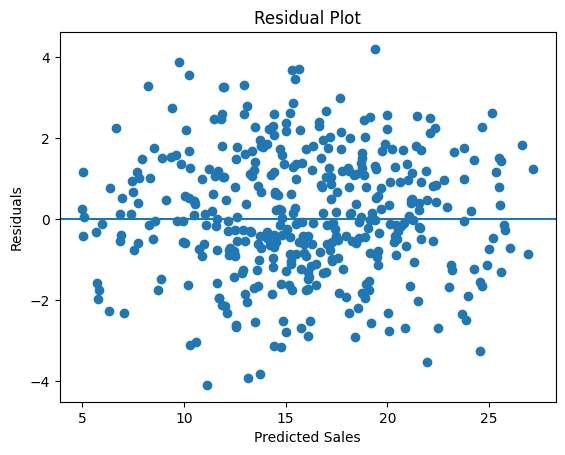

In [23]:
residuals = y_test - y_pred

plt.figure()
plt.scatter(y_pred, residuals)
plt.axhline(y=0)
plt.xlabel("Predicted Sales")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()




Model Performance Analysis:

The Actual vs Predicted plot shows that most data points lie close to
the diagonal line, indicating that the Linear Regression model is able
to predict sales values accurately.

The residual plot shows a random distribution of residuals around zero,
which suggests that the model fits the data well.


Overfitting and Underfitting Analysis:

The model does not show signs of overfitting, as the predictions on
test data are close to the actual values.

There is no clear underfitting since the model captures the linear
relationship between advertising expenditure and sales effectively.


TASK 8 : BUSINESS INSIGHTS

1.How well does the model perform?

The Linear Regression model performs well as the predicted sales values
are close to the actual sales values. This indicates that the model
has learned the relationship between advertising spend and sales.

2.Is the error acceptable compared to the target values?

Yes, the error values are acceptable when compared to the sales values.
The difference between actual and predicted values is relatively small,
which makes the model suitable for basic sales prediction.

3.What does the R² score indicate about the model?

The R² score indicates that a large portion of the variation in sales
is explained by the advertising features. A higher R² value means the
model fits the data well.

4.How can the model be improved further?

The model can be improved by:
- Adding more relevant features
- Removing less important features
- Using advanced models such as Ridge or Lasso Regression
- Trying non-linear models if required
- Increasing the quality and quantity of data
